In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from pyvis.network import Network

1. Граф из 50 вершин со случайными весами от 1 до 10

In [38]:
G = nx.complete_graph(50)
nt = Network(height='750px',
                  width='100%',
                  bgcolor='white',
                  font_color='red',
                  notebook=True)
for edge in G.edges(data=True):
    edge[2]['current_load'] = random.randint(1,10)
    edge[2]
nt.from_nx(G)
nt.barnes_hut()
nt.show('nx.html')

Задача 1

In [28]:
def apply_union(graph, parent, rank, x, y):
        x_root = search(graph, parent, x)
        y_root = search(graph, parent, y)
        if rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root] += 1

In [29]:
def search(graph, parent, i):
        if parent[i] == i:
            return i
        return search(graph, parent, parent[i])

In [30]:
def kruskal(graph):
        result = []
        i, e = 0, 0
        graph = sorted(graph.edges(data=True), key=lambda t: t[2].get('weight', 1))
        parent = []
        rank = []
        for node in range(50):
            parent.append(node)
            rank.append(0)
        while e < 50 - 1:
            u, v, w = graph[i]
            i = i + 1
            x = search(graph, parent, u)
            y = search(graph, parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                apply_union(graph, parent, rank, x, y)
        new_graph = Network(height='750px',
                  width='100%',
                  bgcolor='white',
                  font_color='red',
                  notebook=True)
        result_set = set()
        for u, v, weight in result:
            result_set.add(u)
            result_set.add(v)
        for n in result_set:
            new_graph.add_node(n, size = 10)
        for u, v, weight in result:
            new_graph.add_edge(u,v,value=int(weight['weight']))
        return new_graph

In [39]:
result = kruskal(G)
result.show('nx.html')

Задача 2

In [40]:
rand_lst = [random.randint(0,50) for i in range(5)]
for edge in result.get_edges():
    if edge['to'] in rand_lst:
            edge['value'] = random.randint(1,3)
result.show('nx.html')

Задача 3

In [41]:
def change_weight():
    rand_lst = [random.randint(0,50) for i in range(5)]
    for edge in result.get_edges():
        if edge['to'] in rand_lst:
                edge['value'] = random.randint(1,3)

In [42]:
weights_alteration = []
for i in range(30):
    weights_alteration.append(sum([edge['value'] for edge in result.get_edges()]))
    change_weight()
result.show("nx.html")

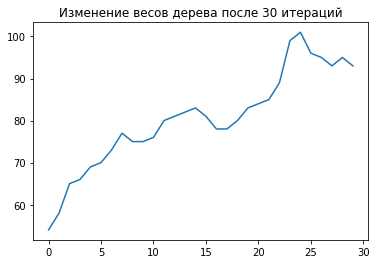

In [43]:
fig, ax = plt.subplots()
ax.set_title('Изменение весов дерева после 30 итераций')
plt.plot(weights_alteration)  

Задача 4

In [44]:
def change_weight_and_range():
    rand_lst = [random.randint(0,50) for i in range(5)]
    start = random.randint(1,100)
    end = random.randint(start, start*2)
    for edge in result.get_edges():
        if edge['to'] in rand_lst:
                edge['value'] = random.randint(start,end)

In [45]:
weights_alteration = []
for i in range(30):
    weights_alteration.append(sum([edge['value'] for edge in result.get_edges()]))
    change_weight_and_range()
result.show("nx.html")

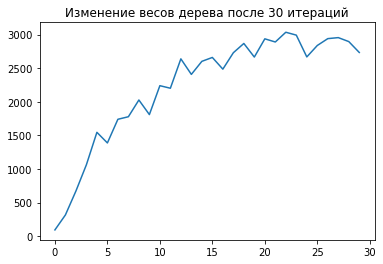

In [46]:
fig, ax = plt.subplots()
ax.set_title('Изменение весов дерева после 30 итераций')
plt.plot(weights_alteration)    